# Epsilon Greedy

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [11]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0.
    self.N = 0. # num samples collected so far

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N
    
bandit = Bandit(0.6)
bandit.pull()

False

In [21]:
for i in range(10000):
    bandit.update(bandit.pull())
bandit.p_estimate

0.6029524834691691

In [22]:
# def experiment():
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

rewards = np.zeros(NUM_TRIALS)
num_times_explored = 0
num_times_exploited = 0
num_optimal = 0
optimal_j = np.argmax([b.p for b in bandits])
print("optimal j:", optimal_j)

for i in range(NUM_TRIALS):

    # use epsilon-greedy to select the next bandit
    if np.random.random() < EPS:
      num_times_explored += 1
      j = np.random.randint(len(bandits))
    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])

    if j == optimal_j:
      num_optimal += 1

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)



# print mean estimates for each bandit
for b in bandits:
    print("mean estimate:", b.p_estimate)

optimal j: 2
mean estimate: 0.21238938053097342
mean estimate: 0.4591549295774648
mean estimate: 0.7526327100795203


In [24]:
# print total reward
print("total reward earned:", rewards.sum())
print("overall win rate:", rewards.sum() / NUM_TRIALS)
print("num_times_explored:", num_times_explored)
print("num_times_exploited:", num_times_exploited)
print("num times selected optimal bandit:", num_optimal)

total reward earned: 7239.0
overall win rate: 0.7239
num_times_explored: 1046
num_times_exploited: 8954
num times selected optimal bandit: 9306


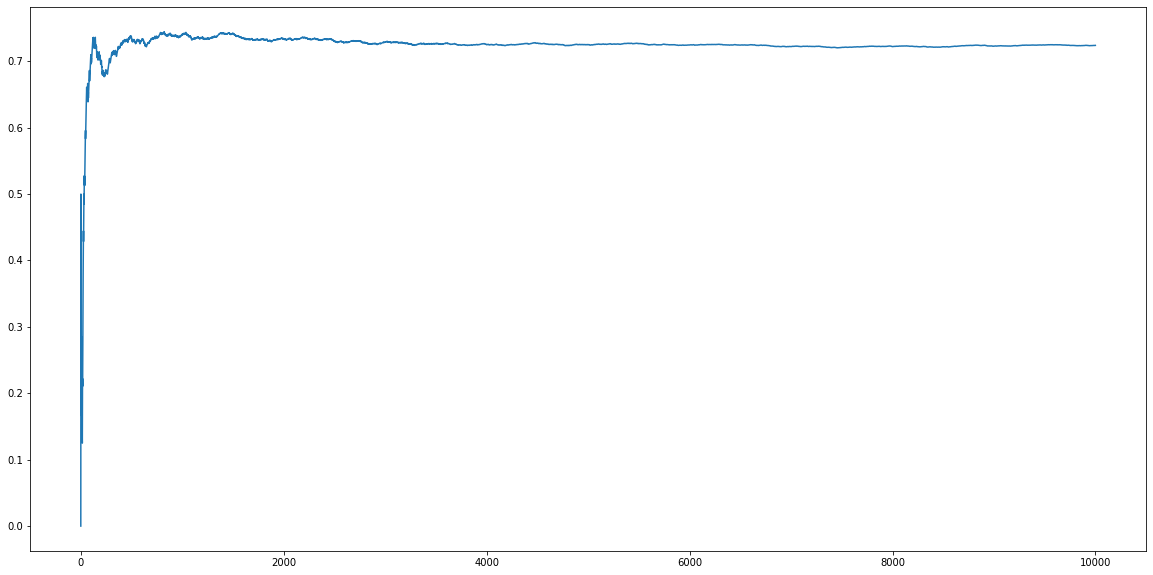

In [26]:
# plot the results
cumulative_rewards = np.cumsum(rewards)
win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
plt.figure(figsize=(20,10))
plt.plot(win_rates)

In [29]:
# plt.figure(figsize=(20,10))
# plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))

# Comparing Epsilons

  0%|          | 0/100000 [00:00<?, ?it/s]

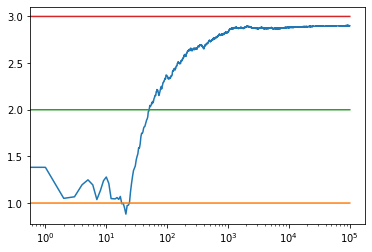

0.993474428137425
1.99674440907624
2.999507911552012


In [34]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x


def run_experiment(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  
  for i in tqdm(range(N)):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)

  0%|          | 0/100000 [00:00<?, ?it/s]

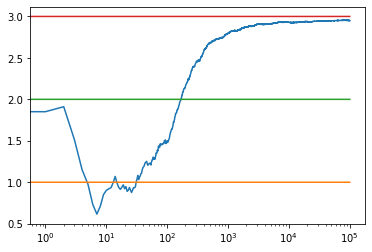

0.9568494536907174
1.9955660045745665
3.0040091137403904


In [35]:
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)

  0%|          | 0/100000 [00:00<?, ?it/s]

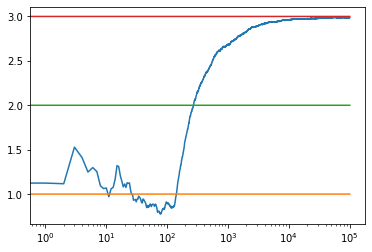

0.9667104167815622
1.9392577549942551
3.000254298819963


In [36]:
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

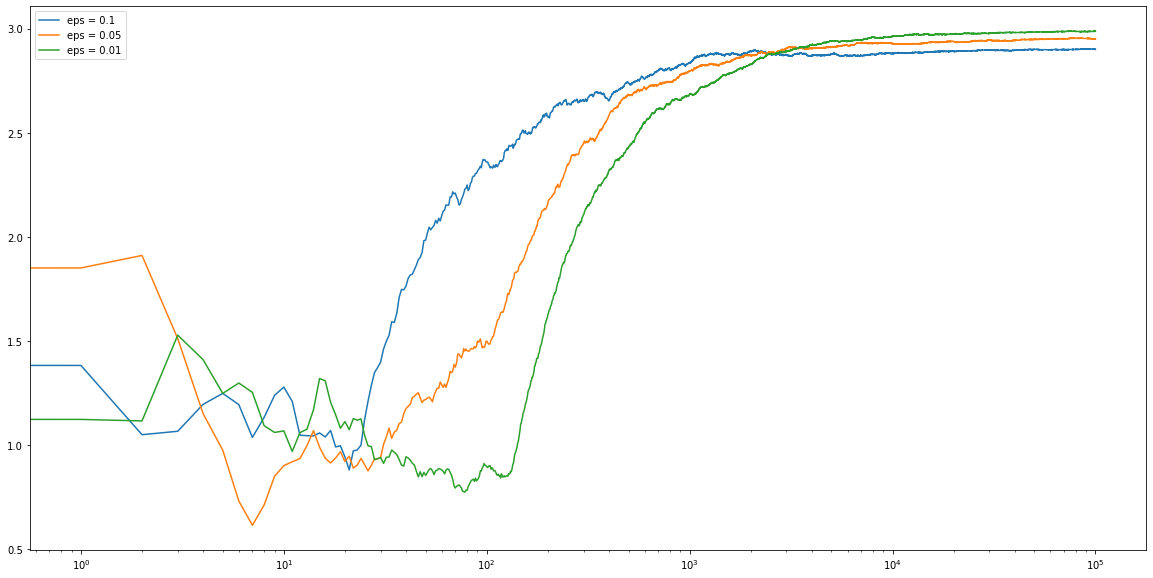

In [39]:
# log scale plot
plt.figure(figsize=(20,10))
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.xscale('log')

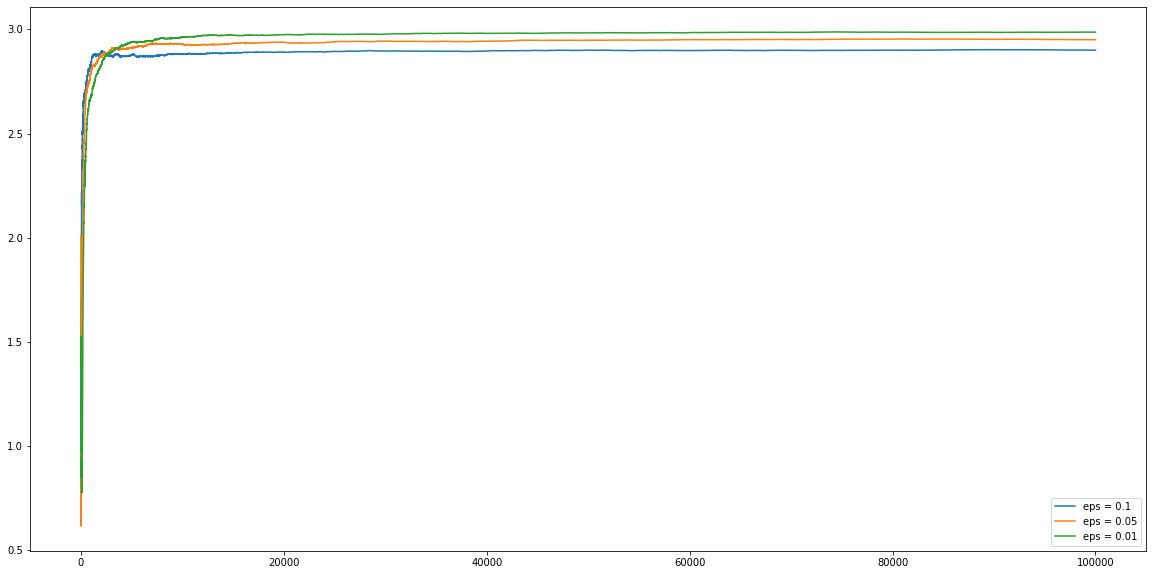

In [40]:
# linear plot
plt.figure(figsize=(20,10))
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.show()